##HW4: Assignment 1

#####All tests use an alpha level of 0.05

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import os
import requests
import StringIO
import zipfile
%matplotlib inline

In [2]:
# Using citibike data from June 2015
r = requests.get('https://s3.amazonaws.com/tripdata/201506-citibike-tripdata.zip')
z = zipfile.ZipFile(StringIO.StringIO(r.content)) 
citi = pd.read_csv(z.open('201506-citibike-tripdata.csv'))
citi = citi.dropna()
citi['starttime'] = pd.to_datetime(citi['starttime'])

In [3]:
data = citi[citi.usertype == 'Subscriber'] 
# use subscriber data


In [4]:
# split out groups by gender (male = 1, female = 2, unknown = 0)
ageF = data[data.gender==2]
ageF = ageF['birth year']
ageM = data[data.gender==1]
ageM = ageM['birth year']

In [5]:
data['starthour'] = data['starttime'].apply(lambda x: x.hour)

In [6]:

night1 = range(18,24) 
night2 = range(0,6)
night_1 = data[data['starthour'].isin(night1)] 
night_2 = data[data['starthour'].isin(night2)]
night = [night_1, night_2]
night = pd.concat(night)
night['starthour'].count() # checks whether code works

257144

In [7]:
# i'm going to define 'day' between 6 am and 6 pm
day = data[(data['starthour'] < 18) & (data['starthour'] >= 6)]
day['starthour'].value_counts() # check

17    81268
8     72541
9     55909
16    53576
15    42776
7     41825
14    41274
13    40491
12    37742
11    32825
10    32773
6     20683
Name: starthour, dtype: int64

In [8]:
day = day['birth year'] # Get a Series with just the birth year
night = night['birth year'] # Get a Series with just the birth year

ageF_sample = ageF.sample(100000,replace=False,random_state=3)
ageM_sample = ageM.sample(100000,replace=False,random_state=6)

##Testing the Age Data Set

####Pearson Test
Measures the possibility of a linear relationship between two data sets. Output of the test includes the correlation coefficient and the p-value to test non-correlation

H0: samples are not correlated

H1: samples are correlated

In [9]:
pearson = scs.pearsonr(ageF_sample, ageM_sample)
print 'Pearson Correlation Coefficient:', pearson[0]
print '\nP-Value:', pearson[1]

Pearson Correlation Coefficient: -0.00198880478446

P-Value: 0.529409252716


From this, we can conclude the correlation of almost 0 (-.00199) and accept the null hypothesis that there is no correlation between the two data sets

####Spearman's Test

This test measures the relationship between two variables (or in this case, two data sets) and how well their relationship can be described by a monotonic function. A monotonic function is a function that is either entirely increasing or entirely decreasing. If rho = 1, a larger x value results in a larger y value.

H0: Samples are not correlated

H1: Samples are correlated

In [10]:
spearman = scs.spearmanr(ageF_sample, ageM_sample)
print 'Rho:', spearman[0]
print '\nP-Value:', spearman[1]

Rho: -0.00226549834833

P-Value: 0.473741033384


Rho is close to zero, so we can assume that there is no monotonic function that can describe the relationship between male and female riders. Since we also have a high p-value, we fail to reject the null hypothesis.

###Running the KS Test

For Kolmogorov-Smirnov statistic on 2 samples:

H0: The two independent samples are from the same continuous distribution.

H1: The two ind. samples are not from the same cont. distribution

For Kolmogorov-Smirnov test for goodness of fit:

H0: The two variables/samples are drawn from the same distribution

H1: The two variables/samples are not drawn from the same distribution

In [11]:
data['ageFem'] = 2015 - ageF
data['ageMal'] = 2015 - ageM

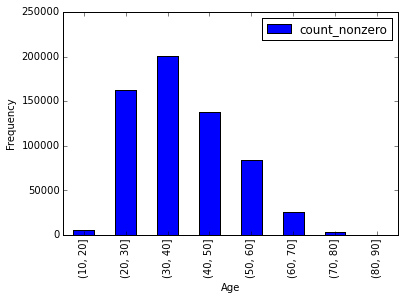

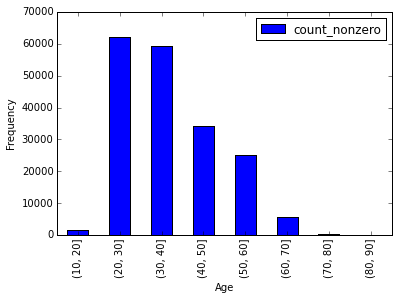

In [14]:
# plot for males
bins = np.arange(10,99,10)
data.ageMal.groupby(pd.cut(data.ageMal, bins)).agg([np.count_nonzero]).plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Frequency')

# now plot for females
bins = np.arange(10,99,10)
data.ageFem.groupby(pd.cut(data.ageFem, bins)).agg([np.count_nonzero]).plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Frequency')

The histrograms show fairly similar distributions between male and female riders

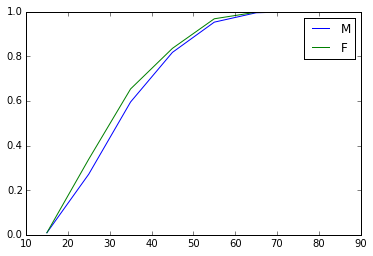

In [16]:
csM = data.ageMal.groupby(pd.cut(data.ageMal, bins)).agg([np.count_nonzero]).cumsum()
csF = data.ageFem.groupby(pd.cut(data.ageFem, bins)).agg([np.count_nonzero]).cumsum()

figure = plt.figure()
plt.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
plt.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
plt.legend()

### KS Test for Goodness of Fit

In [17]:
# test if male ridership has a normal distribution
m = scs.kstest(ageM, 'norm', args=(1978,11))
print 't score:', m[0]
print '\np-value:', m[1]

t score: 0.0839531252327

p-value: 0.0


From this, we can conclude that the male age distribution is not drawn from a normal distribution

In [18]:
# test if female ridership has a female distribution
f = scs.kstest(ageF, 'norm', args = (1978,11))
print 't score:', f[0]
print '\np-value:', f[1]

t score: 0.10846244344

p-value: 0.0


Female age distribution is also not drawn from a normal distribution

###KS Test on Two Samples

In [19]:
ks = scs.ks_2samp(ageM, ageF)
print 't score:', ks[0]
print 'p-value:', ks[1]

t score: 0.076862276801
p-value: 0.0


From this, we should reject the null hypothesis that the two gender distributions are drawn from the same distriubtion. 

#Comparing Daytime and Nighttime Riders

###Pearson Test

In [24]:
# make two datasets the same size
day_sample = day.sample(200000, replace=False, random_state=3)
night_sample = night.sample(200000, replace=False, random_state=3)

In [25]:
pearson = scs.pearsonr(night_sample,day_sample)
print 'Pearson Correlation Coefficient:',pearson[0]
print '\np-value:', pearson[1]

Pearson Correlation Coefficient: -0.00405399293613

p-value: 0.0698323033228


###Spearman's Test

In [27]:
spearman =  scs.spearmanr(night_sample,day_sample)
print 'Rho:', spearman[0]
print 'p-value:', spearman[1]

Rho: -0.00280095121596
p-value: 0.210344727439


###KS Test

####For Day Time:

In [28]:
dm = day_sample.mean()
dstd = day_sample.std()
d = scs.kstest(day_sample, 'norm', args = (dm,dstd))
print 't score:', d[0]
print '\np-value:', d[1]

t score: 0.0936848749484

p-value: 0.0


####For Nighttime:

In [30]:
nm = night_sample.mean()
nstd = night_sample.mean()
n = scs.kstest(night_sample, 'norm', args = (nm,nstd))
print 't score:', n[0]
print '\np-value:', n[1]

t score: 0.495854343587

p-value: 0.0


###KS Test on Two Samples:

In [31]:
ks = scs.ks_2samp(day_sample, night_sample)
print 't score:', ks[0]
print '\np-value:', ks[1]

t score: 0.118375

p-value: 0.0


####Conclusion:
Day and night distributions are not drawn from the sample distribution